### Linear Regression

In [2]:
# Steps involved in the model building  

# 1 Problem Statment /undestand requirement 
# 2 Data collection / data gethering 
# 3 Data preprocessing / data cleaning /data prepration (null values, convert non numeric etc.,)
# 4 Sampling (divide data into train and test)
# 5 Training ( model creation)
# 6 Testing (model validation)

# to further improve the model you may run / rerun from either step 2 or 3 or 4 or 5
#  Problem Statment is that i want to build a predictive model which can do the prediction of Property price

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [40]:
pa = pd.read_csv('Property_Price_Train.csv')

In [19]:
pa.shape

(1459, 81)

In [41]:
#pa.isnull().sum()/1459*100 # gives in null in %

In [42]:
pa= pa.drop(['Id' , 'Lane_Type' , 'Fireplace_Quality' , 'Pool_Quality' , 'Fence_Quality' , 'Miscellaneous_Feature'  ], axis=1)

In [22]:
pa.shape

(1459, 75)

In [43]:
pd.options.display.max_columns = None 
pd.options.display.max_rows = None  # to print all entries in the df

In [44]:
pa.fillna(pa.mean(), inplace=True)  # fill all null values with median where there are numaric

In [46]:
pa = pa.dropna()

In [48]:
pa.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
pa[pa.select_dtypes(include=['object']).columns]  = pa[pa.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [51]:
pa_x = pa.iloc[: , 0:74]
pa_y = pa.iloc[: , 74]
pa_x_train , pa_x_test  , pa_y_train , pa_y_test = train_test_split(pa_x , pa_y , test_size = .2)

In [52]:
reg_pa = LinearRegression()
reg_pa.fit(pa_x_train , pa_y_train)
pred_train  = reg_pa.predict(pa_x_train)
Rsquare = reg_pa.score(pa_x_train , pa_y_train)
Rsquare

0.8449616752714431

In [53]:
# Adjiusted RSquare

#   1 - [(1- Rsquare) * ( N -) /  ( N -  K  -  1)]

N = pa_x_train.shape[0]

K = pa_x_train.shape[1]
Rsquare = reg_pa.score(pa_x_train , pa_y_train)


AdjRSquare  =  1 - (1- Rsquare) * ( N -1) /  ( N -  K  -  1)

print("Adjusted Rsquare is     ---- >   "  , AdjRSquare)

Adjusted Rsquare is     ---- >    0.8343876328475599


In [54]:
reg_pa.intercept_

1930325.826063104

In [55]:
reg_pa.coef_

array([-1.26662160e+02, -1.02366818e+02, -1.40962095e+02,  2.48005010e-01,
        2.07548148e+04, -8.82013914e+02,  3.17340171e+03, -5.17171823e+04,
       -4.21746210e+02,  6.79238077e+03,  3.53962085e+02, -1.16721969e+03,
       -1.07545381e+04, -2.30275923e+03, -1.59414227e+03,  1.06622742e+04,
        5.09571956e+03,  1.90355341e+02,  7.39852308e+01,  2.37216431e+03,
        2.61320825e+04, -5.40270608e+02, -1.33688849e+02,  5.46985332e+03,
        3.40890220e+01, -7.13405087e+03,  6.15416843e+02,  1.51764322e+03,
       -9.47160778e+03,  2.50601942e+03, -4.10275219e+03, -5.45258621e+02,
        3.30403442e+00,  9.19408431e+02,  1.17020360e+01, -5.94287908e+00,
        9.06319137e+00, -1.99370817e+03, -1.08231099e+03,  9.86338200e+02,
       -8.62117936e+02,  1.79748448e+01,  2.08597547e+01, -1.22218786e+01,
        2.66127210e+01,  5.78196014e+03,  2.85101415e+03,  3.83348038e+03,
       -3.74479702e+02, -2.90370890e+03, -1.14146256e+04, -9.36992984e+03,
        3.34057613e+03,  

In [56]:
pred_train_pa = reg_pa.predict(pa_x_train)
pred_test_pa = reg_pa.predict(pa_x_test)

In [57]:
error_train_pa  = pa_y_train -  pred_train_pa

In [59]:
#error_train_pa

In [60]:
import numpy as np

In [61]:
np.mean(error_train_pa)

-6.155961931779467e-10

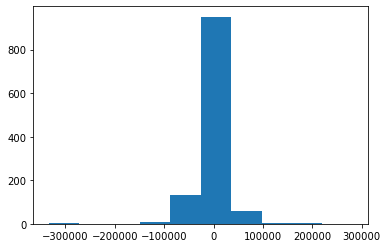

In [62]:
plt.hist(error_train_pa );

In [64]:
import seaborn as sns

/home/dell/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<AxesSubplot:xlabel='Sale_Price'>

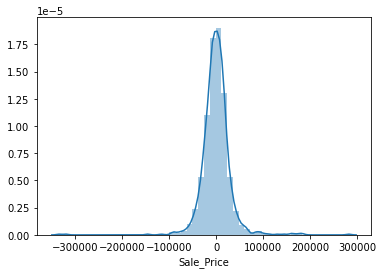

In [65]:
sns.distplot(error_train_pa)

In [66]:
error_test_pa = pa_y_test - pred_test_pa

In [71]:
MSE  = np.mean(np.square(error_test_pa))
MSE

RMSE = np.sqrt(MSE)

MAPE  =  np.mean(np.abs(error_test_pa / pa_y_test))

print("MSE IS "   , MSE , "\nRMSE IS     ",  RMSE , " \nMAPE IS    "  , MAPE)

MSE IS  553376067.7094189 
RMSE IS      23523.946686502648  
MAPE IS     0.10433120475906973


In [72]:
Acc = 100- MAPE * 100
Acc

89.56687952409303

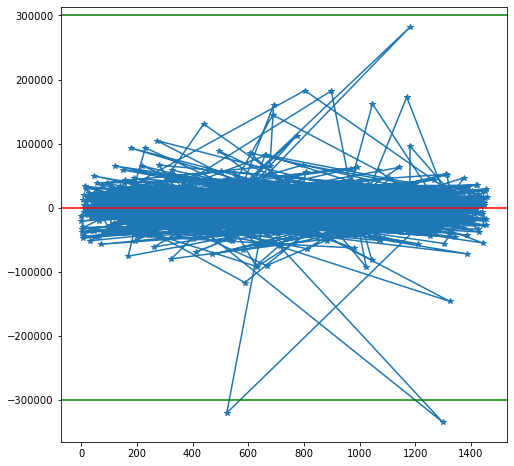

In [73]:
plt.figure(figsize= (8 , 8))

plt.plot(   error_train_pa , marker  =  "*")
plt.axhline(y  = np.mean(error_train_pa)  , color = "r")
plt.axhline(y  = 300000  , color = "g")
plt.axhline(y  = -300000  , color = "g")reg_pa.intercept_reg_pa.intercept_

In [76]:
error_train_pa = pa_y_train -  pred_train_pa
pred_actual_train = pd.DataFrame( {"Predicted" :pred_train_pa , "Actual" : pa_y_train , "Error" : error_train_pa} )

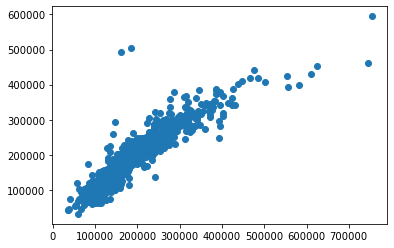

In [77]:
plt.scatter(x = "Actual" , y = "Predicted" , data = pred_actual_train )

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

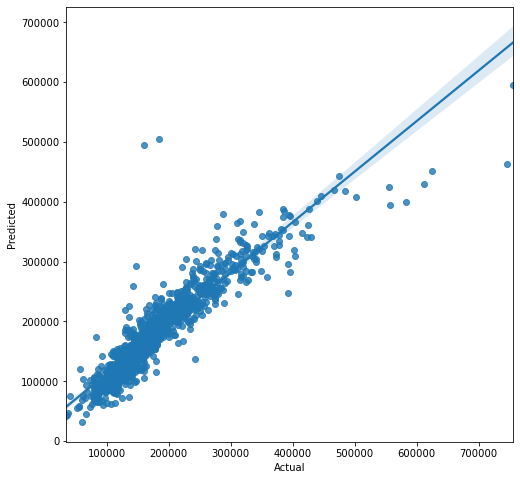

In [79]:
plt.figure(figsize= (8 , 8))
sns.regplot(pred_actual_train.Actual , pred_actual_train.Predicted)